In [24]:
import numpy as np,pandas as pd

In [25]:
df = pd.read_csv('movies.csv')

In [26]:
df

,Unnamed: 0,Title,Released_year,run_time,rating,certificate,genre,votes,meta_score,director,gross
0,1,Tenet,2020,150,7.3,U/A,"Action, Sci-Fi, Thriller","592,946",69,Christopher Nolan,58.46
1,2,The Irishman,2019,209,7.8,16,"Biography, Crime, Drama","431,242",94,Martin Scorsese,7.00
2,3,Midsommar,2019,148,7.1,A,"Drama, Horror, Mystery","403,598",72,Ari Aster,27.33
3,4,John Wick: Chapter 3 - Parabellum,2019,130,7.4,A,"Action, Crime, Thriller","425,986",73,Chad Stahelski,171.02
4,5,Us,2019,116,6.8,A,"Horror, Mystery, Thriller","341,298",81,Jordan Peele,175.08
...,...,...,...,...,...,...,...,...,...,...,...
705,706,Shichinin no samurai,1954,207,8.6,U,"Action, Drama","366,935",98,Akira Kurosawa,0.27
706,707,The Third Man,1949,104,8.1,U,"Film-Noir, Mystery, Thriller","181,869",97,Carol Reed,0.45
707,708,Casablanca,1942,102,8.5,U,"Drama, Romance, War","606,165",100,Michael Curtiz,1.02
708,709,Citizen Kane,1941,119,8.3,U/A,"Drama, Mystery","466,077",100,Orson Welles,1.59


In [27]:
df.drop(columns='Unnamed: 0', inplace=True)

In [28]:
df

,Title,Released_year,run_time,rating,certificate,genre,votes,meta_score,director,gross
0,Tenet,2020,150,7.3,U/A,"Action, Sci-Fi, Thriller","592,946",69,Christopher Nolan,58.46
1,The Irishman,2019,209,7.8,16,"Biography, Crime, Drama","431,242",94,Martin Scorsese,7.00
2,Midsommar,2019,148,7.1,A,"Drama, Horror, Mystery","403,598",72,Ari Aster,27.33
3,John Wick: Chapter 3 - Parabellum,2019,130,7.4,A,"Action, Crime, Thriller","425,986",73,Chad Stahelski,171.02
4,Us,2019,116,6.8,A,"Horror, Mystery, Thriller","341,298",81,Jordan Peele,175.08
...,...,...,...,...,...,...,...,...,...,...
705,Shichinin no samurai,1954,207,8.6,U,"Action, Drama","366,935",98,Akira Kurosawa,0.27
706,The Third Man,1949,104,8.1,U,"Film-Noir, Mystery, Thriller","181,869",97,Carol Reed,0.45
707,Casablanca,1942,102,8.5,U,"Drama, Romance, War","606,165",100,Michael Curtiz,1.02
708,Citizen Kane,1941,119,8.3,U/A,"Drama, Mystery","466,077",100,Orson Welles,1.59


### How is the distribution of movies across different release years?

In [154]:
df.groupby('Released_year').agg(No_of_movies_released=('Released_year','count'))

,No_of_movies_released
Released_year,
1939,1
1941,1
1942,1
1949,1
1954,3
...,...
2016,17
2017,14
2018,6


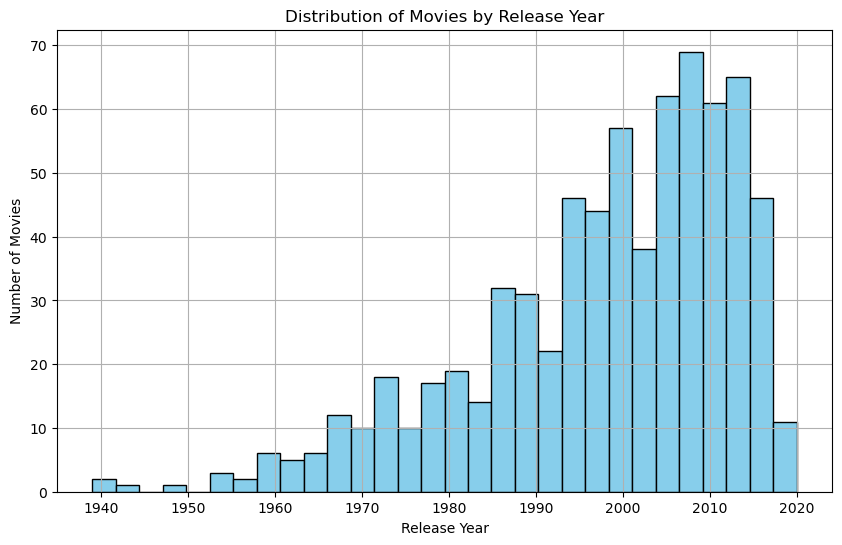

In [155]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Released_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### What is the distribution of movie runtimes?

In [156]:
df.groupby('run_time').agg(No_of_movies_released=('run_time','count'))

,No_of_movies_released
run_time,
78,1
79,1
81,4
83,3
84,4
...,...
207,1
209,1
212,1


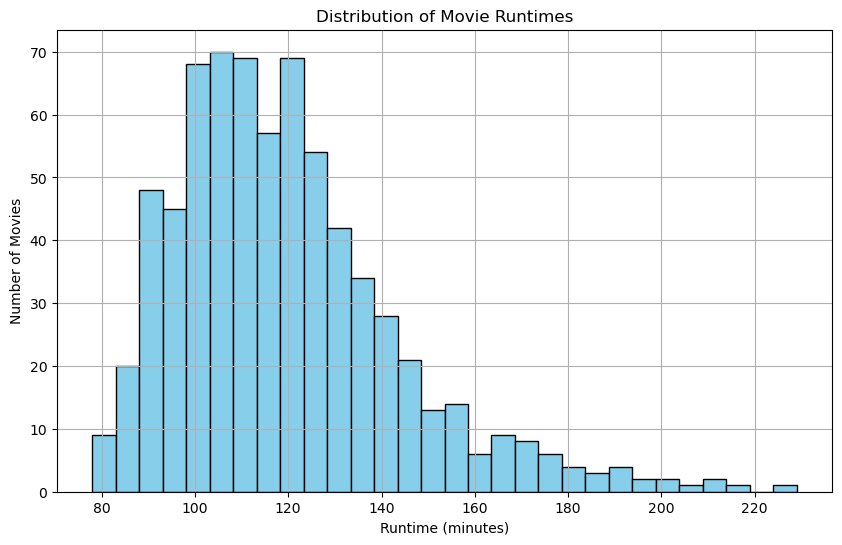

In [157]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['run_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# distribution of movies by certificate

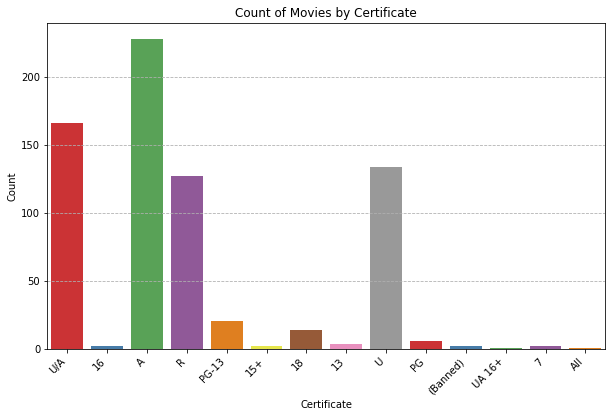

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='certificate', data=df, palette='Set1')
plt.title('Count of Movies by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

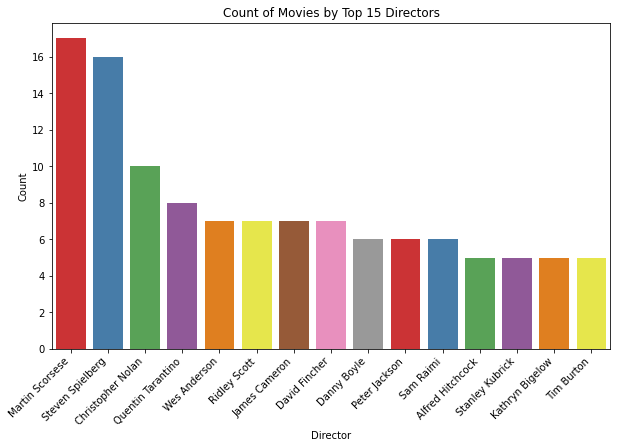

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate movie count for each director
director_counts = df['director'].value_counts()
top_directors = director_counts.head(15)

# Filter DataFrame to include only movies by top directors
df_top_directors = df[df['director'].isin(top_directors.index)]

# sort top directors according to number of movies
df_top_directors_sorted = df_top_directors['director'].value_counts().reset_index()
df_top_directors_sorted.columns = ['director', 'count']
df_top_directors_sorted = df_top_directors_sorted.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='director', y='count', data=df_top_directors_sorted, palette='Set1')
plt.title('Count of Movies by Top 15 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--')
plt.show()


# Distribution of movies according to release year

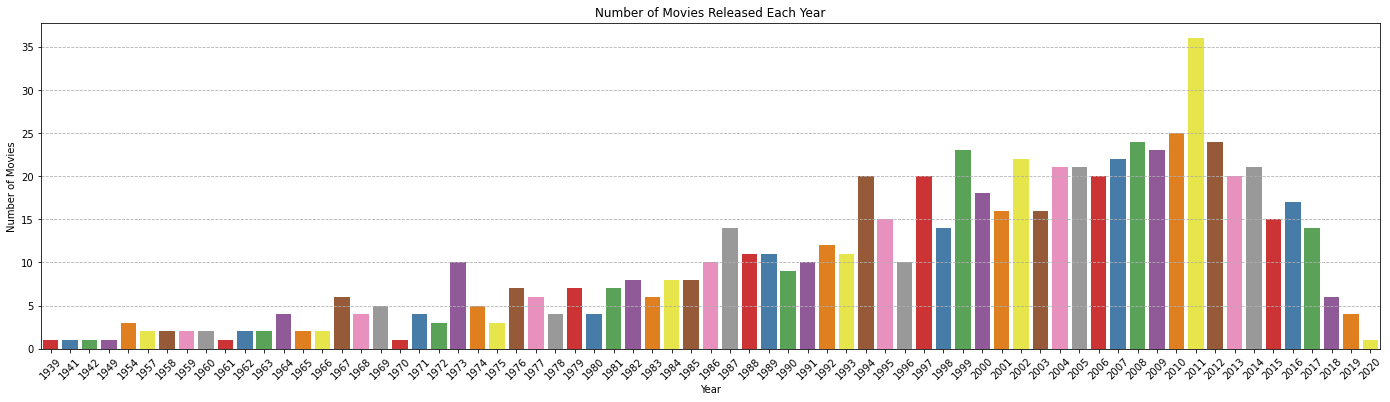

In [70]:
plt.figure(figsize=(24, 6))
sns.countplot(x='Released_year', data=df, palette='Set1')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

### What is the distribution of movie ratings?

In [158]:
df.groupby('rating').agg(rating=('Released_year','count'))

,rating
rating,
5.3,1
5.8,2
6.1,1
6.3,5
6.4,6
6.5,3
6.6,9
6.7,7
6.8,23


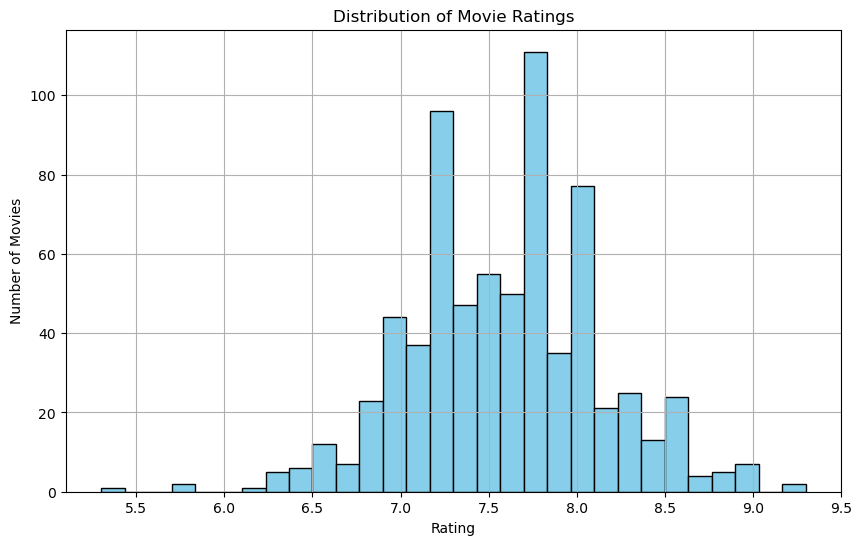

In [159]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# Most common genre according to movie makers

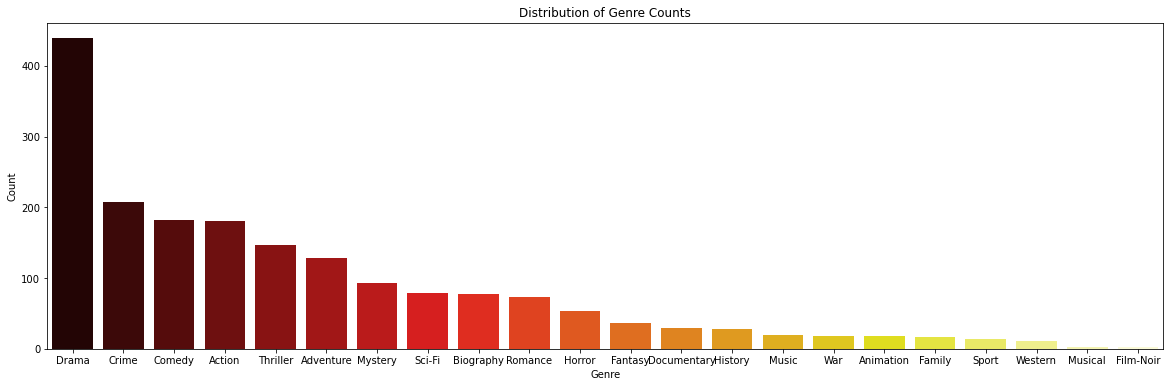

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
genre_counts = df['genre'].str.split(',').explode().str.strip().value_counts()
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
plt.figure(figsize=(20,6))
sns.barplot(x='Genre', y='Count', data=genre_counts_df, palette='hot')
plt.title('Distribution of Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
# plt.grid(axis='x', linestyle='--')
plt.show()

## Bivariate Analysis

### Is there a correlation between movie ratings and gross earnings?


In [160]:
correlation = df['rating'].corr(df['gross'])
correlation

0.2082909038910009

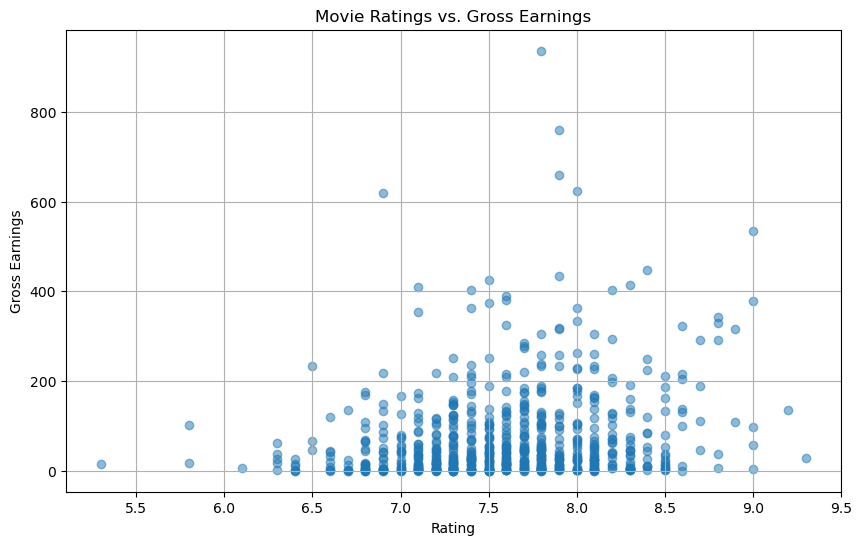

Correlation coefficient between movie ratings and gross earnings: 0.2082909038910009


In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['gross'], alpha=0.5)
plt.title('Movie Ratings vs. Gross Earnings')
plt.xlabel('Rating')
plt.ylabel('Gross Earnings')
plt.grid(True)
plt.show()

# Calculating correlation coefficient
correlation = df['rating'].corr(df['gross'])
print("Correlation coefficient between movie ratings and gross earnings:", correlation)

### How does the runtime of a movie relate to its rating?

In [180]:
correlation = df['run_time'].corr(df['rating'])
correlation

0.4080291077015472

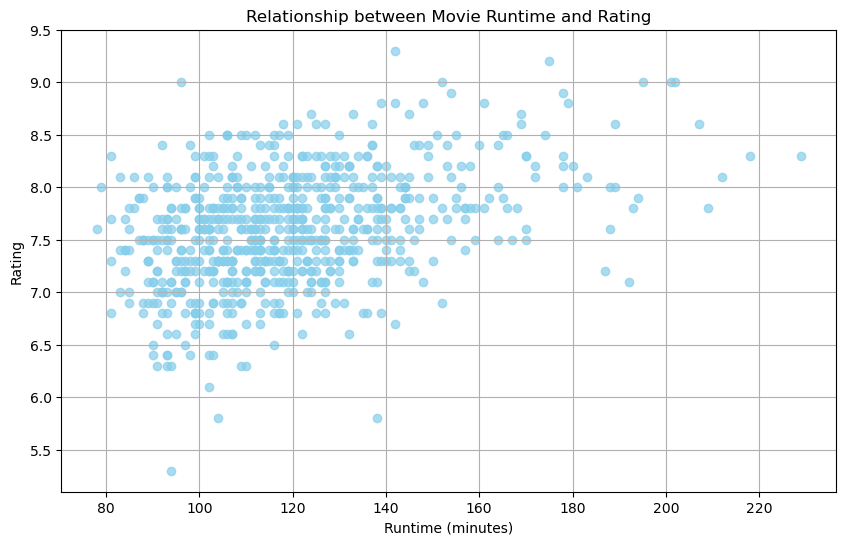

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(df['run_time'],df['rating'], color='skyblue', alpha=0.7)
plt.title('Relationship between Movie Runtime and Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

### Do certain directors tend to make more profitable movies?

In [163]:
df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)

director
J.J. Abrams         442.806667
Francis Lawrence    424.670000
Lee Unkrich         415.000000
Tim Miller          363.070000
James Gunn          361.495000
George Lucas        351.500000
David Leitch        324.590000
Joss Whedon         324.395000
Taika Waititi       315.060000
Irvin Kershner      290.480000
Name: gross, dtype: float64

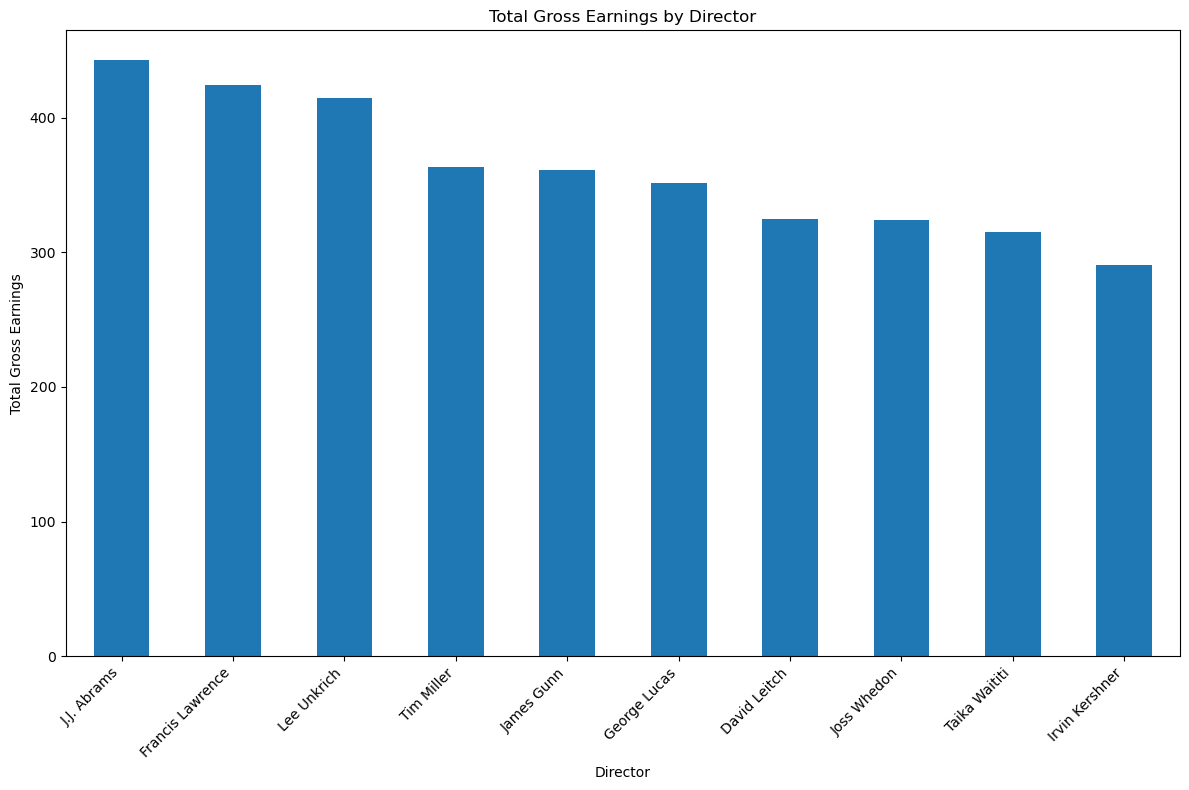

In [164]:
director_gross = df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)

# Plotting bar chart
plt.figure(figsize=(12, 8))
director_gross.plot(kind='bar')
plt.title('Total Gross Earnings by Director')
plt.xlabel('Director')
plt.ylabel('Total Gross Earnings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 ### How does IMDb rating correlate with Metascore ratings?

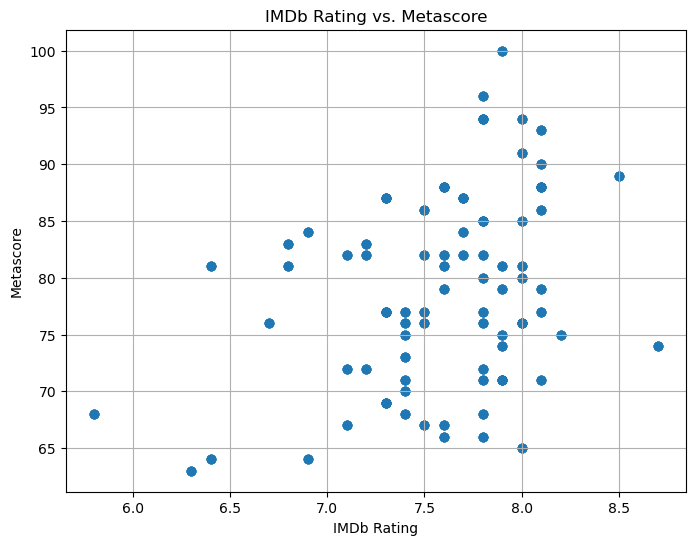

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['rating'], df['meta_score'], alpha=0.5)
plt.title('IMDb Rating vs. Metascore')
plt.xlabel('IMDb Rating')
plt.ylabel('Metascore')
plt.grid(True)
plt.show()

In [24]:
correlation_coefficient = df['rating'].corr(df['meta_score'])

print("Correlation Coefficient between IMDb Rating and Metascore:", correlation_coefficient)

Correlation Coefficient between IMDb Rating and Metascore: 0.3310562626469257


### Has the average rating of movies changed over the years?

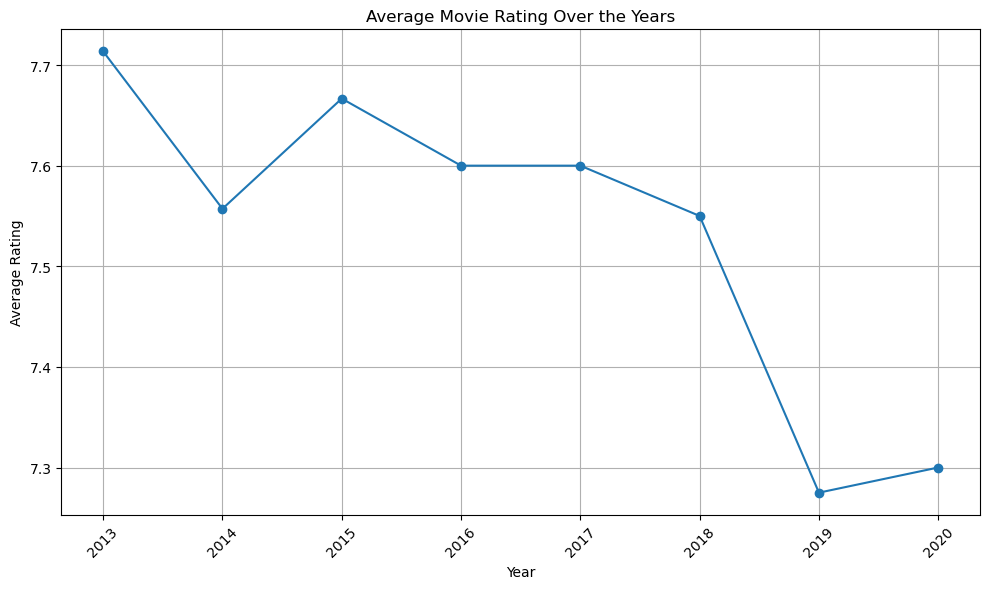

In [28]:
average_rating_per_year = df.groupby('Released_year')['rating'].mean()

# Plotting the average rating over the years
plt.figure(figsize=(10, 6))
plt.plot(average_rating_per_year.index, average_rating_per_year.values, marker='o', linestyle='-')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(average_rating_per_year.index, rotation=45) 
plt.tight_layout()

### Are there any directors whose movies consistently receive higher ratings compared to others?

In [43]:
director_ratings = df.groupby('director')['rating'].mean().reset_index()

director_ratings_sorted = director_ratings.sort_values(by='rating', ascending=False)
director_ratings_sorted

,director,rating
105,Frank Darabont,8.950
129,Irvin Kershner,8.700
5,Akira Kurosawa,8.600
102,Francis Ford Coppola,8.575
358,Tony Kaye,8.500
...,...,...
38,Ben Wheatley,6.350
274,Peter Hewitt,6.300
250,Nicholas Stoller,6.300
246,Neil LaBute,6.300


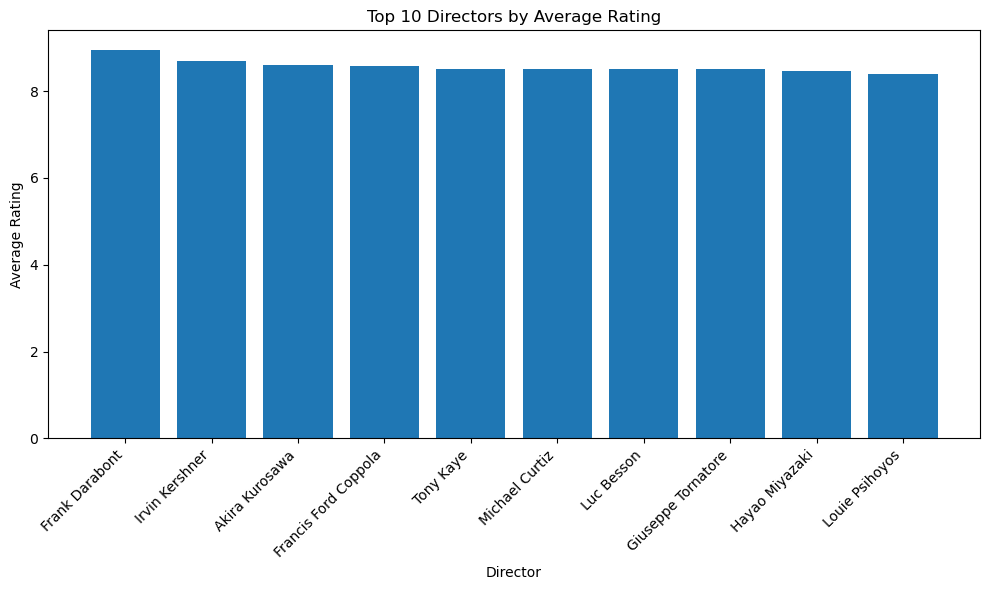

In [190]:
plt.figure(figsize=(10, 6))
plt.bar(director_ratings_sorted['director'][:10], director_ratings_sorted['rating'][:10])
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

top_director = director_ratings_sorted.iloc[0]['rating']
overall_mean_rating = director_ratings['rating'].mean()

# Perform t-test
t_statistic, p_value = stats.ttest_1samp(director_ratings['rating'], overall_mean_rating)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.0
P-Value: 1.0


### Does the movie's certificate (e.g., PG, PG-13, R) have an impact on its rating? Do movies with certain certificates tend to have higher or lower ratings?


In [194]:
certificate_ratings = df.groupby('certificate')['rating'].mean().reset_index()
certificate_ratings

,certificate,rating
0,(Banned),7.500000
1,13,7.775000
2,15+,8.050000
3,16,7.600000
4,18,7.407143
5,7,8.150000
6,A,7.676754
7,All,7.600000
8,PG,7.283333
9,PG-13,7.638095


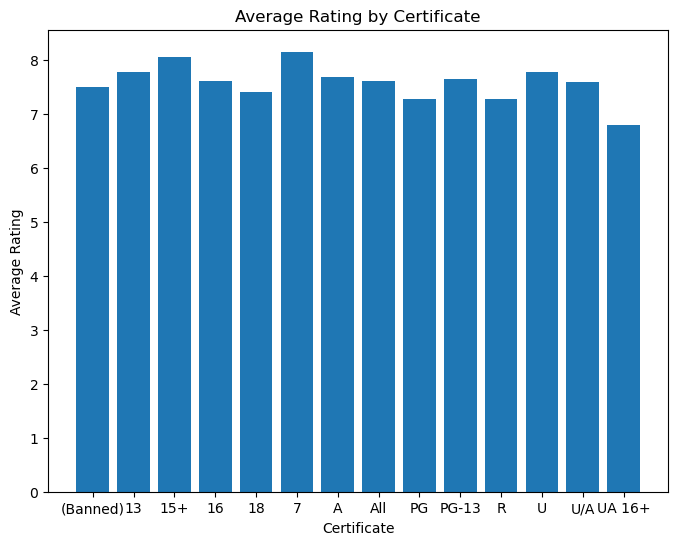

In [195]:
plt.figure(figsize=(8, 6))
plt.bar(certificate_ratings['certificate'], certificate_ratings['rating'])
plt.xlabel('Certificate')
plt.ylabel('Average Rating')
plt.title('Average Rating by Certificate')
plt.show()

### Are there any directors whose movies consistently receive higher ratings compared to others?

In [205]:
director_ratings = df.groupby('director')['rating'].mean().reset_index()
d=director_ratings.sort_values(by='rating',ascending=False)
dd = d.head(10)
dd

,director,rating
105,Frank Darabont,8.950
129,Irvin Kershner,8.700
5,Akira Kurosawa,8.600
102,Francis Ford Coppola,8.575
358,Tony Kaye,8.500
227,Michael Curtiz,8.500
208,Luc Besson,8.500
118,Giuseppe Tornatore,8.500
127,Hayao Miyazaki,8.450
207,Louie Psihoyos,8.400


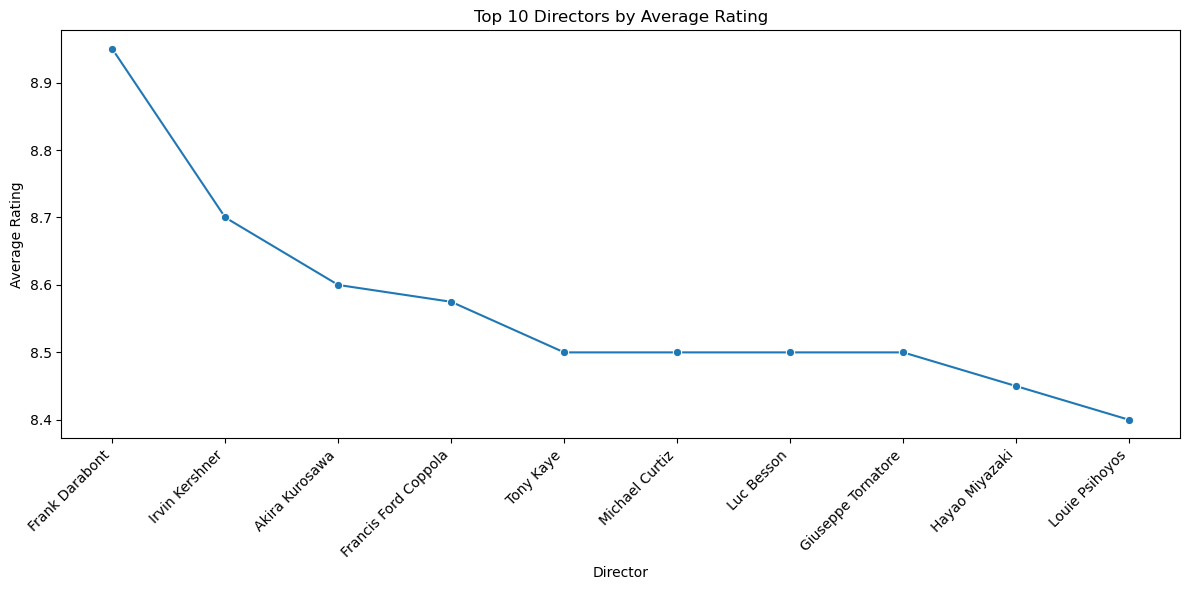

In [214]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dd, x='director', y='rating', marker='o')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
### Are there any directors whose movies consistently receive higher ratings compared to?

### How does the distribution of movies directed by different directors vary in the film industry

In [16]:
import matplotlib.pyplot as plt
director_counts = df['director'].value_counts()
top_directors = director_counts.head(10) 
print(top_directors)
# Create a DataFrame with top directors and their movie counts
top_directors_df = pd.DataFrame({'director': top_directors.index, 'Number of Movies': top_directors.values})
print(top_directors_df)


Martin Scorsese      17
Steven Spielberg     16
Christopher Nolan    10
Quentin Tarantino     8
Wes Anderson          7
Ridley Scott          7
James Cameron         7
David Fincher         7
Danny Boyle           6
Sam Raimi             6
Name: director, dtype: int64
            director  Number of Movies
0    Martin Scorsese                17
1   Steven Spielberg                16
2  Christopher Nolan                10
3  Quentin Tarantino                 8
4       Wes Anderson                 7
5       Ridley Scott                 7
6      James Cameron                 7
7      David Fincher                 7
8        Danny Boyle                 6
9          Sam Raimi                 6


In [15]:
import plotly.express as px
genre_counts = df['genre'].str.split(',').explode().str.strip().value_counts()
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
top_directors = df.groupby('director')['gross'].sum().nlargest(10).index

df_top_10 = df[df['director'].isin(top_directors)]

# Create a Sunburst Plot
fig = px.sunburst(df_top_10, path=['director', 'genre'], values='gross')

# Update layout
fig.update_layout(
    title="Top 10 Directors Movies Gross Collection by Genre",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

# Show plot
fig.show()


In [19]:
import plotly.express as px
genre_counts = df['genre'].str.split(',').explode().str.strip().value_counts()
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
top_directors = df.groupby('director')['gross'].sum().nlargest(10).index

df_top_10 = df[df['director'].isin(top_directors)]

# Create a Sunburst Plot
fig = px.sunburst(df_top_10, path=['Released_year','director', 'genre'], values='gross')

# Update layout
fig.update_layout(
    title="Top 10 Directors Movies Gross Collection by Genre  and Released_year",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

# Show plot
fig.show()


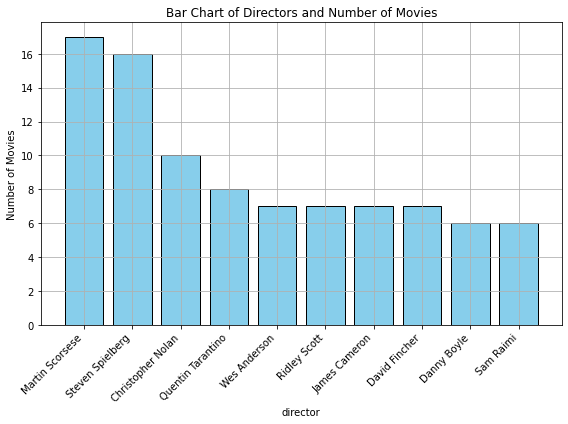

In [17]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named top_directors_df with columns 'Director' and 'Number of Movies'

plt.figure(figsize=(8, 6))
plt.bar(top_directors_df['director'], top_directors_df['Number of Movies'], color='skyblue', edgecolor='black')
plt.xlabel('director')
plt.ylabel('Number of Movies')
plt.title('Bar Chart of Directors and Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### rating based on genre

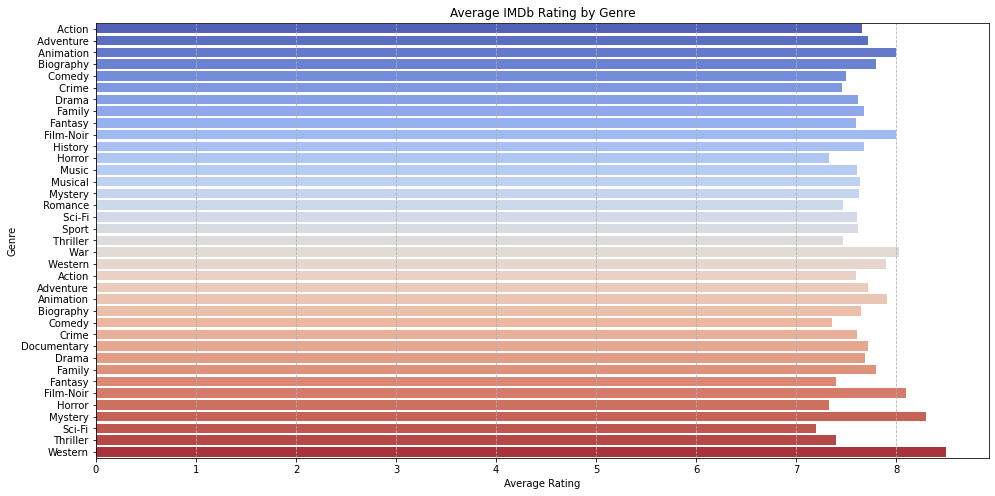

In [46]:
import seaborn as sns
genre_ratings = df.assign(genre=df['genre'].str.split(',')).explode('genre')

# Calculate average rating for each genre
genre_ratings = genre_ratings.groupby('genre')['rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='rating', y='genre', data=genre_ratings, palette='coolwarm')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7444\2500781161.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




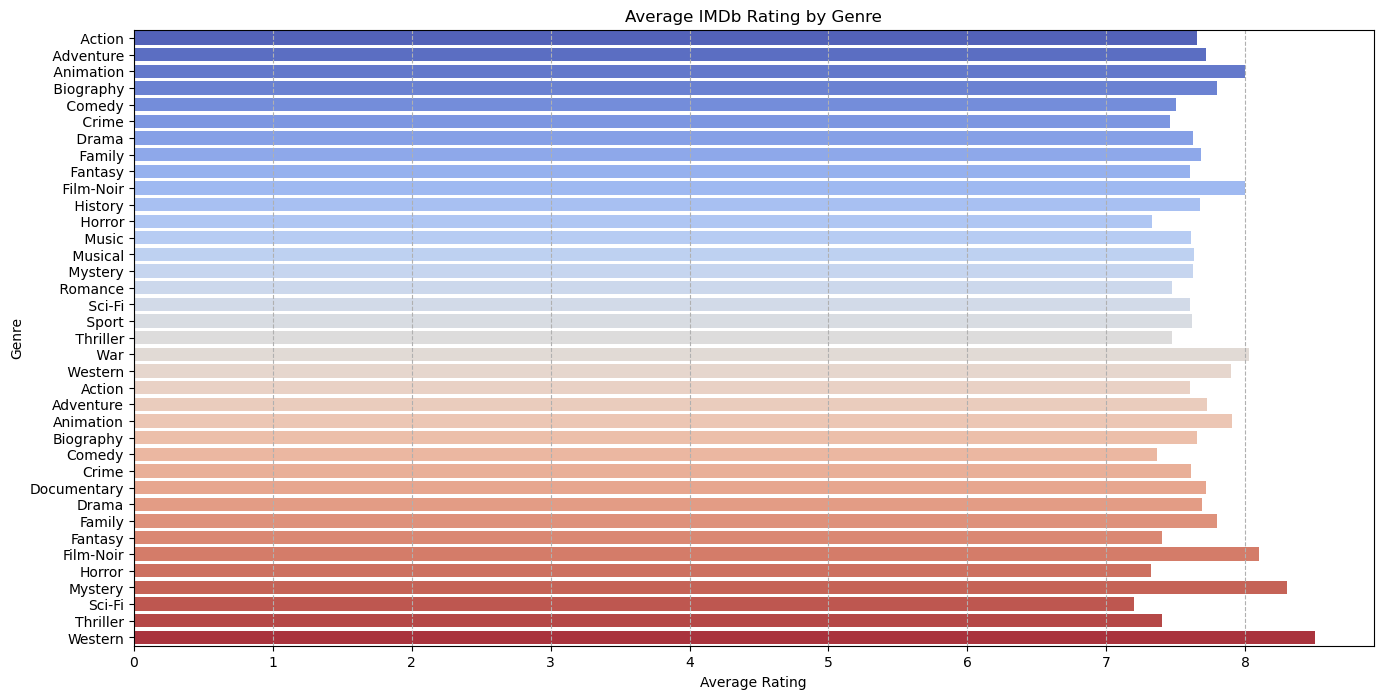

In [35]:
genre_ratings = df.assign(genre=df['genre'].str.split(','))

# Exploding the dataframe
genre_ratings = genre_ratings.explode('genre')

# Calculate average rating for each genre
genre_mean_ratings = genre_ratings.groupby('genre')['rating'].mean()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x=genre_mean_ratings.values, y=genre_mean_ratings.index, palette='coolwarm')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--')
plt.show()

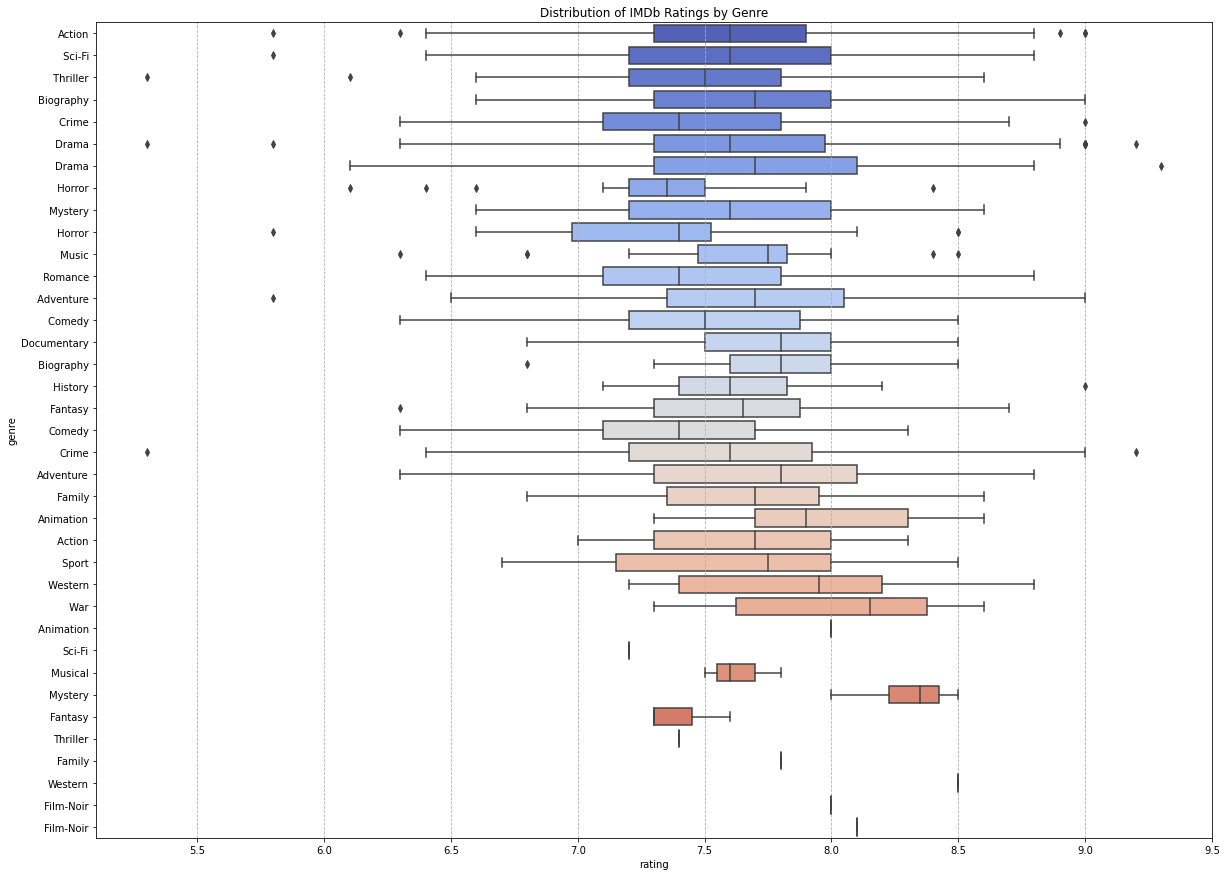

In [51]:
genre_ratings = df.assign(genre=df['genre'].str.split(',')).explode('genre')

# Plotting
plt.figure(figsize=(20, 15))
sns.boxplot(x='rating', y='genre', data=genre_ratings, palette='coolwarm')
plt.title('Distribution of IMDb Ratings by Genre')
plt.xlabel('rating')
plt.ylabel('genre')
plt.grid(axis='x', linestyle='--')
plt.show()

### genre wise gross

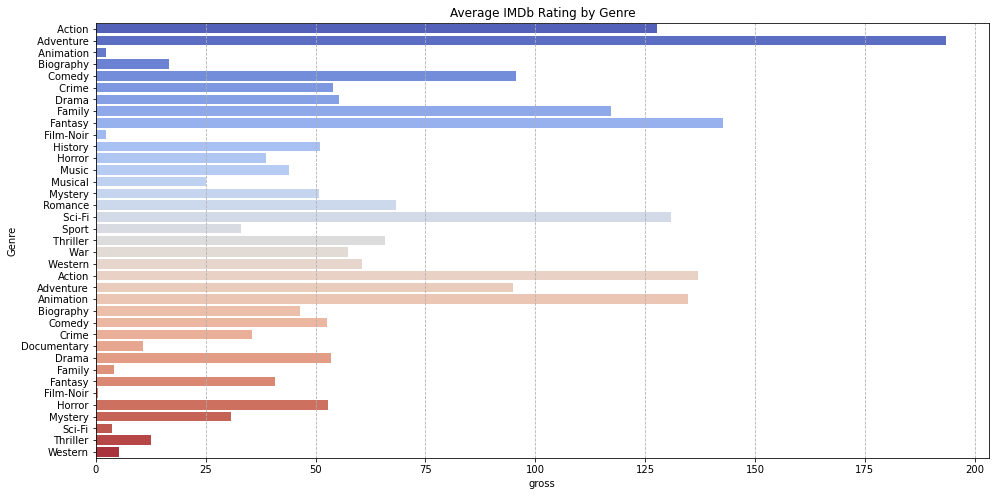

In [26]:
import seaborn as sns
genre_ratings = df.assign(genre=df['genre'].str.split(',')).explode('genre')

# Calculate average rating for each genre
genre_ratings = genre_ratings.groupby('genre')['gross'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='gross', y='genre', data=genre_ratings, palette='coolwarm')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('gross')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          710 non-null    object 
 1   Released_year  710 non-null    int64  
 2   run_time       710 non-null    int64  
 3   rating         710 non-null    float64
 4   certificate    710 non-null    object 
 5   genre          710 non-null    object 
 6   votes          710 non-null    object 
 7   meta_score     710 non-null    int64  
 8   director       710 non-null    object 
 9   gross          710 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 55.6+ KB
